**# AUTHOR: LESA ASHRAF**

**TASK ONE:CREDIT CARD FRAUD** **DETECTION**

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


The following processes are being performed in order to obtain the result:
1. Undersampling
2. Train Test
3. Scaling
4. Logistic Regression
5. Neural Network Model

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

read

In [1]:
df = pd.read_csv('./creditcard.csv')

NameError: ignored

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

0    284315
1       492
Name: Class, dtype: int64
Percentage of Fraud case in the dataset: 0.1727485630620034 %


<Axes: xlabel='Class', ylabel='count'>

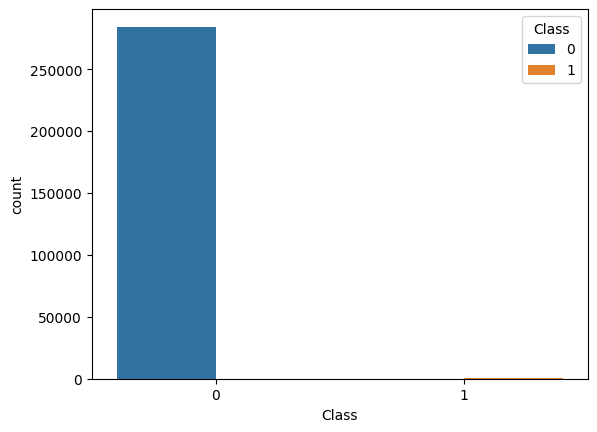

In [7]:
print(df['Class'].value_counts())

print(f"Percentage of Fraud case in the dataset: {(len(df[df['Class']== 1])/len(df))*100} %")

sns.countplot(data = df, x = 'Class', hue = 'Class')

#### Highly Imbalanced dataset

## using undersampling as per the research paper

**UNDERSAMPLING:**

Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class.


In [8]:
from sklearn.utils import resample


df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

In [9]:
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=2*df_minority.shape[0],
                                   random_state= 25)

In [10]:
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# check the new class distribution
print(df_balanced['Class'].value_counts())

0    984
1    492
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

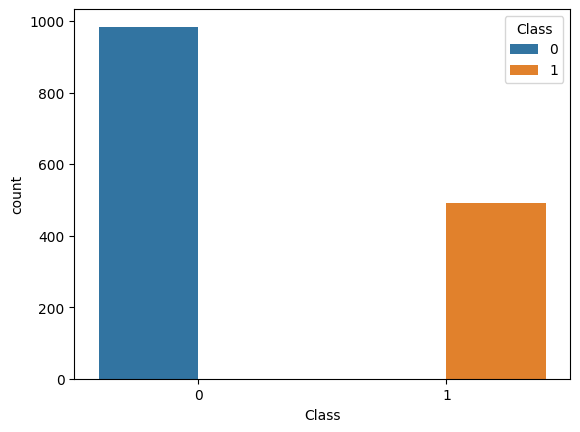

In [11]:
#Plotting aftr Undersampling
sns.countplot(data = df_balanced, x = 'Class', hue = 'Class')

In [12]:
df_balanced.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
270868,164303.0,-1.097222,0.353235,0.922740,-2.482786,-0.105249,-0.184947,-0.100673,0.481019,-1.062346,...,0.164649,0.328810,-0.498031,-1.043474,0.924309,-0.052164,0.128869,0.012683,23.80,0
140021,83493.0,-0.630556,0.920834,1.544361,-0.505343,0.282691,-0.792788,0.704038,0.070959,-0.672297,...,-0.150666,-0.609634,-0.071476,0.255576,-0.271271,-0.084206,0.041023,0.111986,0.99,0
20345,30974.0,-1.528035,-0.149136,1.630621,0.321879,0.965413,0.140374,0.718746,0.291817,-0.562373,...,0.102693,-0.045641,0.001520,-0.331837,0.756374,-0.396158,-0.018264,0.065365,128.00,0
256398,157672.0,-0.984714,1.567510,-1.346594,0.932186,1.561973,-0.202130,0.964876,0.303447,-0.989686,...,0.081396,0.447138,-0.020641,0.108025,0.155235,-0.407761,0.099543,0.201292,16.10,0
161202,113977.0,2.026669,-0.169353,-2.963794,-0.572662,2.602445,3.145164,-0.407581,0.782573,0.359077,...,-0.348086,-1.000637,0.357306,0.605186,-0.267133,0.218923,-0.040534,-0.041566,8.99,0


**SCALING:**

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [13]:
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()

In [14]:
X = df_balanced.drop(['Class'], axis = 1)
Y = df_balanced['Class']

In [15]:
print(X.shape, Y.shape)

(1476, 30) (1476,)


In [16]:
X_scaled = sd.fit_transform(X)

In [17]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.524141,0.100902,-0.277781,0.607735,-1.338946,0.266447,0.155632,0.357077,0.080593,-0.106420,...,0.044554,-0.031599,0.313908,-0.472234,-1.811623,1.464612,-0.100400,0.088439,-0.046318,-0.309314
1,-0.164376,0.198656,-0.103019,0.722981,-0.668529,0.374830,-0.212463,0.518336,-0.019185,0.080872,...,-0.264842,-0.164996,-0.572053,-0.041356,0.480802,-0.458851,-0.168397,-0.012830,0.216933,-0.406846
2,-1.261755,0.010658,-0.432459,0.738973,-0.388074,0.565570,0.352640,0.521283,0.034556,0.133654,...,0.141331,-0.057810,-0.039602,0.032381,-0.555802,1.194437,-0.830397,-0.081176,0.093341,0.136230
3,1.385587,0.124469,0.096091,0.187013,-0.181160,0.732237,0.145227,0.570606,0.037385,-0.071530,...,-0.218379,-0.066820,0.425619,0.009995,0.220419,0.227317,-0.855021,0.054631,0.453679,-0.342238
4,0.472584,0.755273,-0.438684,-0.112808,-0.691352,1.022925,2.172276,0.295575,0.153970,0.576110,...,-0.241571,-0.248516,-0.941189,0.391774,1.097756,-0.452194,0.474879,-0.106849,-0.190130,-0.372639


**TRAIN TEST SPLIT:**

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state= 25, shuffle= True)

In [19]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score, recall_score, f1_score, precision_score

# Train XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators = 100)
xgb_clf.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_clf.predict(X_test)

#Print Classifaction Report
print('Classification Report:')
print(classification_report(y_test, y_pred))
print("Accuracy:")
print(accuracy_score(y_test, y_pred))
print("Recall:")
print(recall_score(y_test, y_pred))
print("F1 Score:")
print(f1_score(y_test, y_pred))
print("Precision:")
print(precision_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       200
           1       0.95      0.88      0.91        96

    accuracy                           0.95       296
   macro avg       0.95      0.93      0.94       296
weighted avg       0.95      0.95      0.95       296

Accuracy:
0.9459459459459459
Recall:
0.875
F1 Score:
0.9130434782608695
Precision:
0.9545454545454546


Confusion matrix:


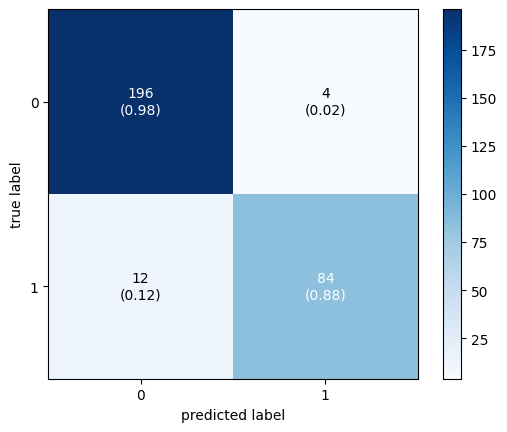

ROC-AUC score: 0.9765104166666667


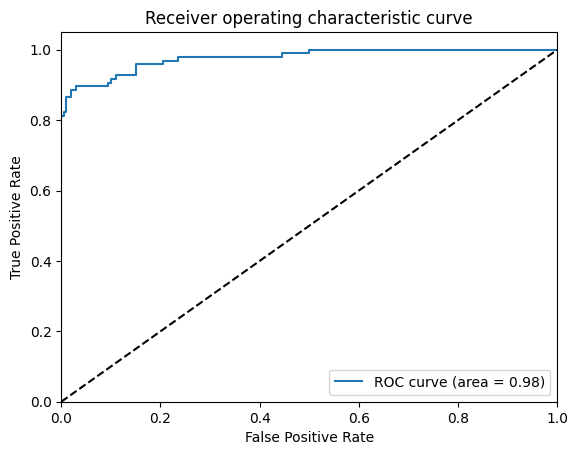

In [20]:
from mlxtend.plotting import plot_confusion_matrix
# Confusion matrix
conf_matrix = np.array(confusion_matrix(y_test, y_pred))
print('Confusion matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()


# ROC-AUC curve and score
y_prob = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print('ROC-AUC score:', roc_auc)


# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

**LOGISTIC REGRESSION:**

A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables. It allows algorithms used in machine learning applications to classify incoming data based on historical data. As additional relevant data comes in, the algorithms get better at predicting classifications within data sets.Logistic regression can also play a role in data preparation activities by allowing data sets to be put into specifically predefined buckets during the extract, transform, load (ETL) process in order to stage the information for analysis.

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty= 'l2')

In [22]:
lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = xgb_clf.predict(X_test)


#Print Classifaction Report
print('Classification Report:')
print(classification_report(y_test, y_pred_lr))
print("Accuracy:")
print(accuracy_score(y_test, y_pred_lr))
print("Recall:")
print(recall_score(y_test, y_pred_lr))
print("F1 Score:")
print(f1_score(y_test, y_pred_lr))
print("Precision:")
print(precision_score(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       200
           1       0.95      0.88      0.91        96

    accuracy                           0.95       296
   macro avg       0.95      0.93      0.94       296
weighted avg       0.95      0.95      0.95       296

Accuracy:
0.9459459459459459
Recall:
0.875
F1 Score:
0.9130434782608695
Precision:
0.9545454545454546


Confusion matrix:


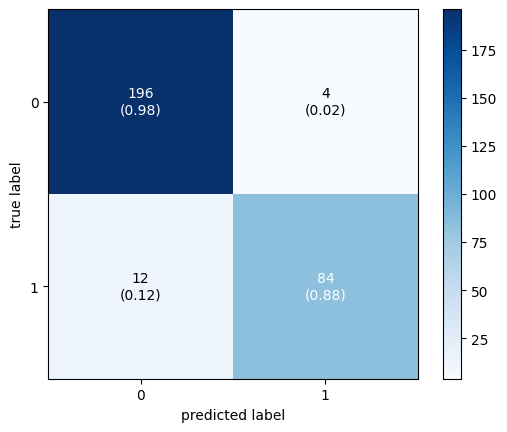

ROC-AUC score: 0.9717708333333334


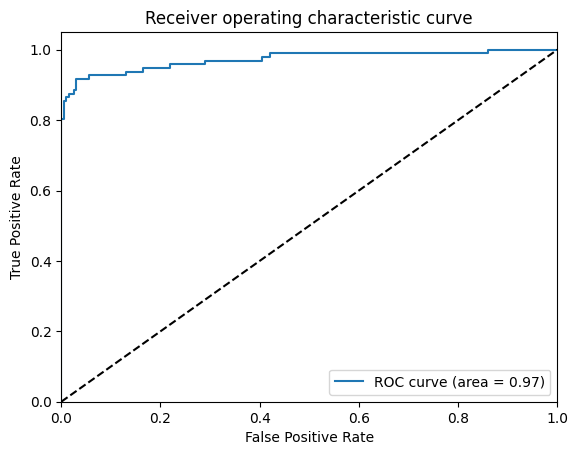

In [23]:
# Confusion matrix
conf_matrix = np.array(confusion_matrix(y_test, y_pred_lr))
print('Confusion matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()


# ROC-AUC curve and score
y_prob_lr = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = roc_auc_score(y_test, y_prob_lr)
print('ROC-AUC score:', roc_auc)


# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

## Neural Network Model

**NEURAL NETWORK MODEL:**

A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain. It is a type of machine learning process, called deep learning, that uses interconnected nodes or neurons in a layered structure that resembles the human brain. It creates an adaptive system that computers use to learn from their mistakes and improve continuously. Thus, artificial neural networks attempt to solve complicated problems, like summarizing documents or recognizing faces, with greater accuracy.

In [24]:
from sklearn.neural_network import MLPClassifier

# Create an instance of the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation = 'logistic')

# Train the MLPClassifier on the training data
mlp.fit(X_train, y_train)

# Evaluate the MLPClassifier on the testing data
score = mlp.score(X_test, y_test)
print("MLPClassifier accuracy: {:.2f}%".format(score * 100))

MLPClassifier accuracy: 94.93%


In [25]:
# Predict on test set
y_pred_mlp = mlp.predict(X_test)


#Print Classifaction Report
print('Classification Report:')
print(classification_report(y_test, y_pred_mlp))
print("Accuracy:")
print(accuracy_score(y_test, y_pred_mlp))
print("Recall:")
print(recall_score(y_test, y_pred_mlp))
print("F1 Score:")
print(f1_score(y_test, y_pred_mlp))
print("Precision:")
print(precision_score(y_test, y_pred_mlp))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       200
           1       0.97      0.88      0.92        96

    accuracy                           0.95       296
   macro avg       0.95      0.93      0.94       296
weighted avg       0.95      0.95      0.95       296

Accuracy:
0.9493243243243243
Recall:
0.875
F1 Score:
0.9180327868852458
Precision:
0.9655172413793104


Confusion matrix:


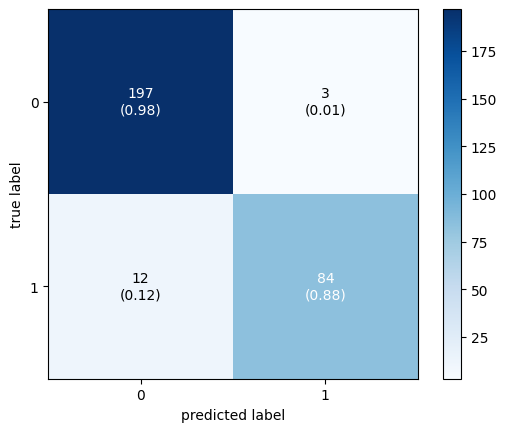

ROC-AUC score: 0.973125


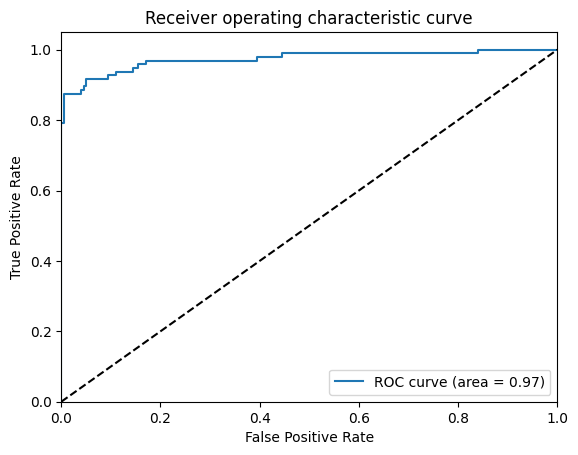

In [26]:
# Confusion matrix
conf_matrix = np.array(confusion_matrix(y_test, y_pred_mlp))
print('Confusion matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()


# ROC-AUC curve and score
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_mlp)
roc_auc = roc_auc_score(y_test, y_prob_mlp)
print('ROC-AUC score:', roc_auc)


# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()